 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

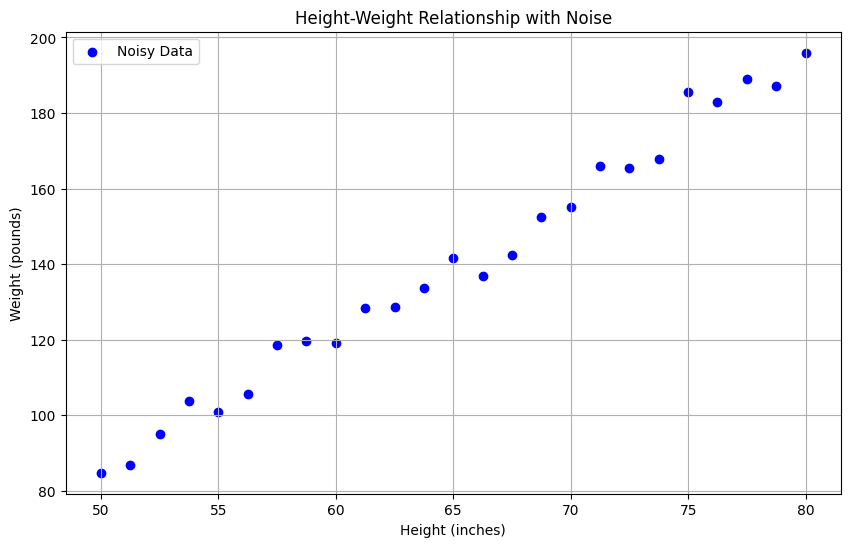

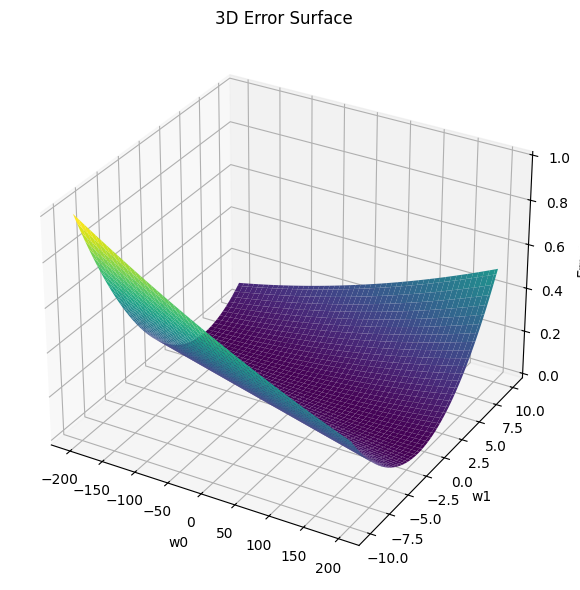

Minimum Error Surface Parameters: w0 = -103.0303, w1 = 3.7374

Least Squares Estimated Parameters:
w0 (intercept) = -98.7219
w1 (slope) = 3.6688


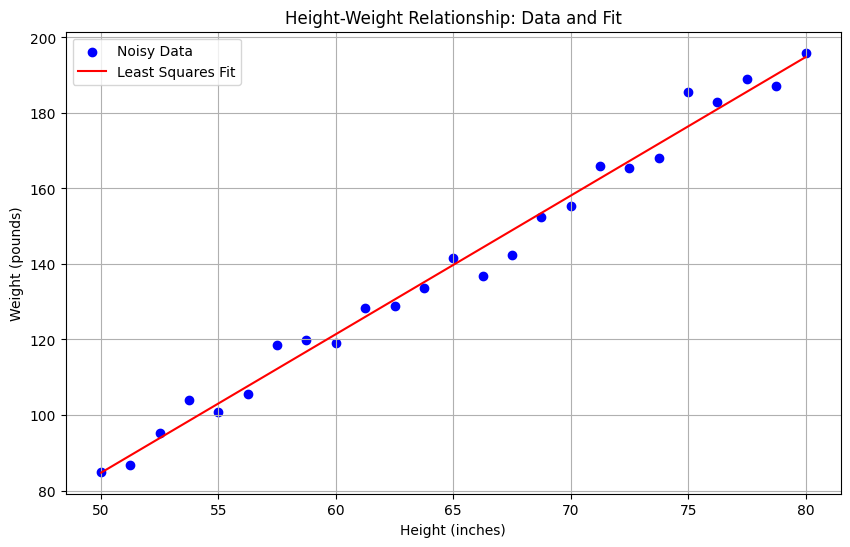


Comparison with True Relationship:
True Slope: 3.86
True Intercept: -110.42
Estimated Slope: 3.6688
Estimated Intercept: -98.7219


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# (a) Generate meaningful data points
def generate_noisy_data(num_points=25):
    # True relationship: t = 3.86x - 110.42
    x = np.linspace(50, 80, num_points)  # Reasonable height range

    # True relationship
    true_t = 3.86 * x - 110.42

    # Add Gaussian noise with zero mean and variance of 20
    noise = np.random.normal(0, np.sqrt(20), num_points)
    t = true_t + noise

    return x, t

# Generate data
x, t = generate_noisy_data()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, t, color='blue', label='Noisy Data')
plt.title('Height-Weight Relationship with Noise')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.grid(True)
plt.show()

# (b) Error Surface Generation
def compute_error_surface(x, t):
    # Create a grid of w0 and w1 values
    w0_range = np.linspace(-200, 200, 100)
    w1_range = np.linspace(-10, 10, 100)

    # Create meshgrid
    W0, W1 = np.meshgrid(w0_range, w1_range)

    # Compute error surface
    Error = np.zeros_like(W0)
    for i in range(W0.shape[0]):
        for j in range(W0.shape[1]):
            # Compute prediction for each point
            y_pred = W0[i,j] + W1[i,j] * x

            # Compute mean squared error
            Error[i,j] = np.mean((t - y_pred)**2)

    return W0, W1, Error

# Compute error surface
W0, W1, Error = compute_error_surface(x, t)

# Plot 3D error surface
fig = plt.figure(figsize=(15, 6))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W0, W1, Error, cmap='viridis')
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Error')
ax1.set_title('3D Error Surface')

# Contour Plot
# ax2 = fig.add_subplot(122)
# contour = ax2.contourf(W0, W1, Error, levels=50, cmap='viridis')
# plt.colorbar(contour)
# ax2.set_xlabel('w0')
# ax2.set_ylabel('w1')
# ax2.set_title('Error Surface Contour')

plt.tight_layout()
plt.show()

# Find the minimum of the error surface
min_error_idx = np.unravel_index(np.argmin(Error), Error.shape)
w0_min = W0[min_error_idx]
w1_min = W1[min_error_idx]
print(f"Minimum Error Surface Parameters: w0 = {w0_min:.4f}, w1 = {w1_min:.4f}")

# (c) Least Squares Approach
def linear_regression(x, t):
    # Least squares solution
    X = np.column_stack((np.ones_like(x), x))
    w_opt = np.linalg.inv(X.T @ X) @ X.T @ t
    return w_opt

# Estimate weights
w_ls = linear_regression(x, t)
print("\nLeast Squares Estimated Parameters:")
print(f"w0 (intercept) = {w_ls[0]:.4f}")
print(f"w1 (slope) = {w_ls[1]:.4f}")

# Plot original data with least squares fit
plt.figure(figsize=(10, 6))
plt.scatter(x, t, color='blue', label='Noisy Data')
plt.plot(x, w_ls[0] + w_ls[1]*x, color='red', label='Least Squares Fit')
plt.title('Height-Weight Relationship: Data and Fit')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.grid(True)
plt.show()

# Compare with true relationship
print("\nComparison with True Relationship:")
print(f"True Slope: 3.86")
print(f"True Intercept: -110.42")
print(f"Estimated Slope: {w_ls[1]:.4f}")
print(f"Estimated Intercept: {w_ls[0]:.4f}")





<b> Report your observations </b>

1.It minimizes errors between observed data points and the fitted line

2.The formulas for calculating the slope (m) and intercept (b) in simple linear regression are:
m = (n∑xy - ∑x∑y) / [n∑x^2 - (∑x)^2]
b = (∑y - m∑x) / n

3.Least squares regression assumes that errors are normally distributed, which makes the outcomes more accurate.



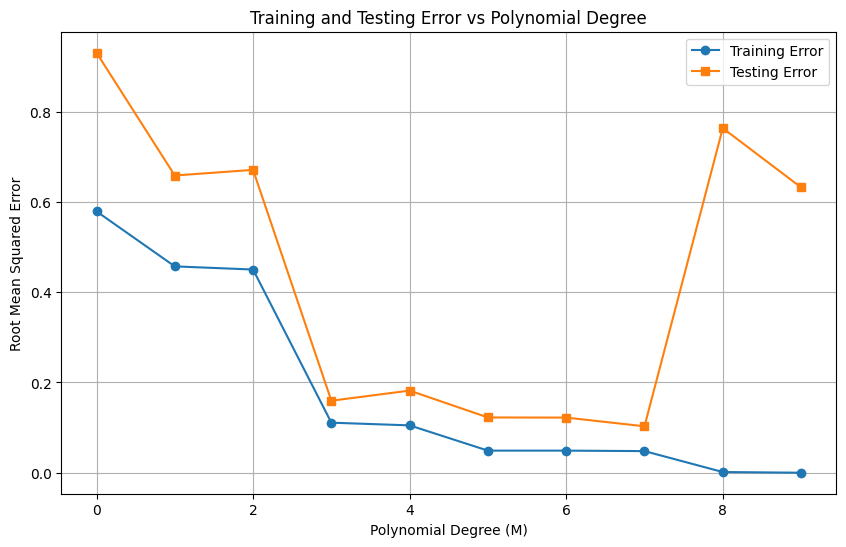

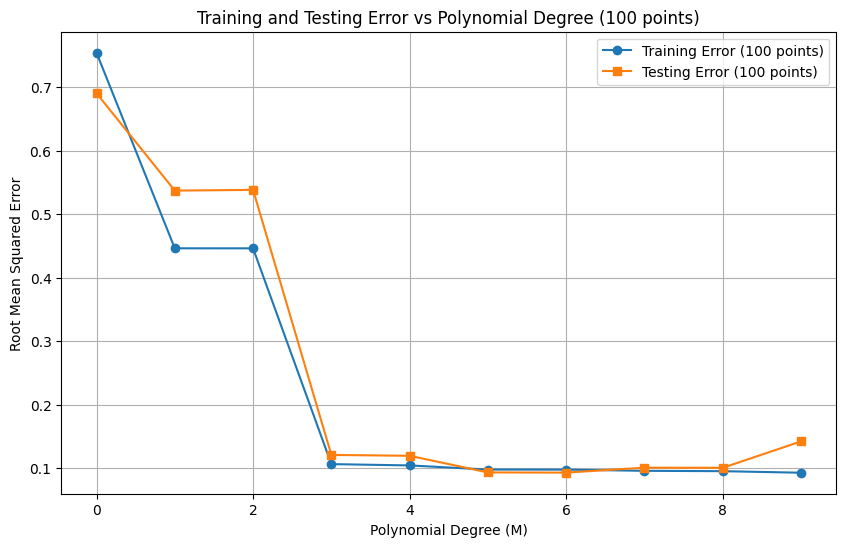

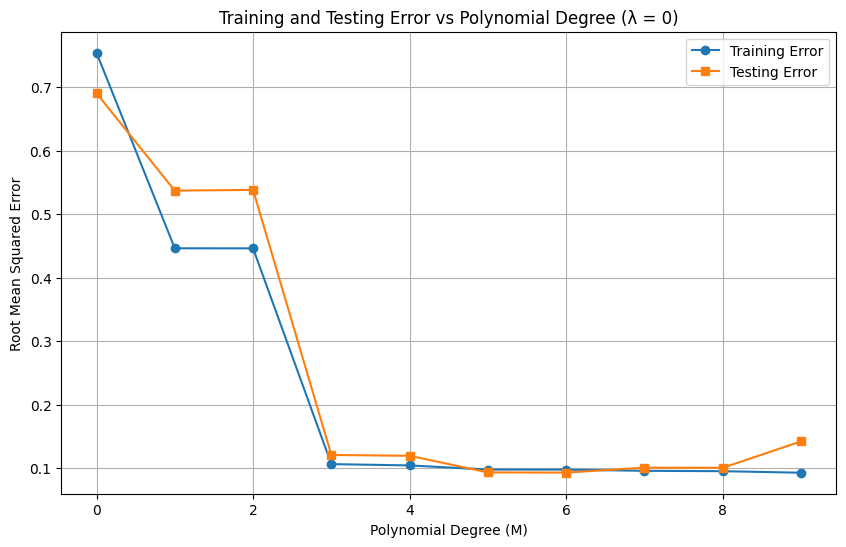

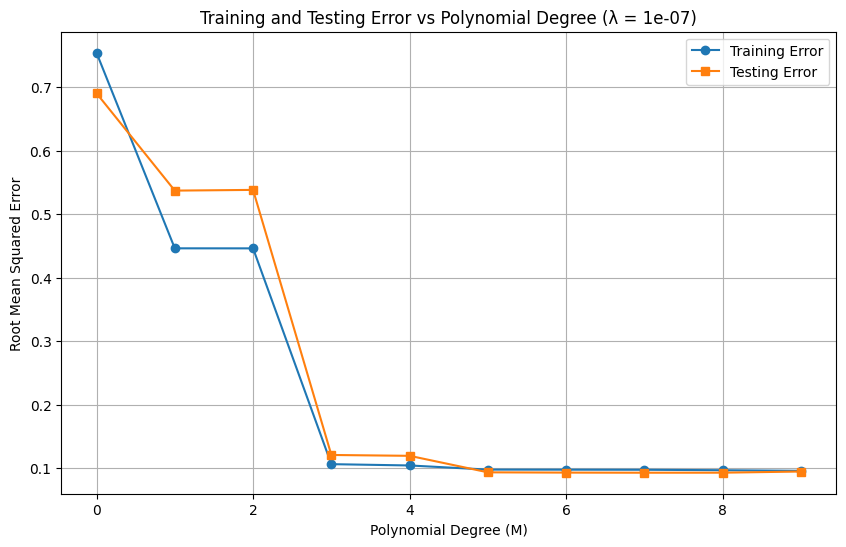

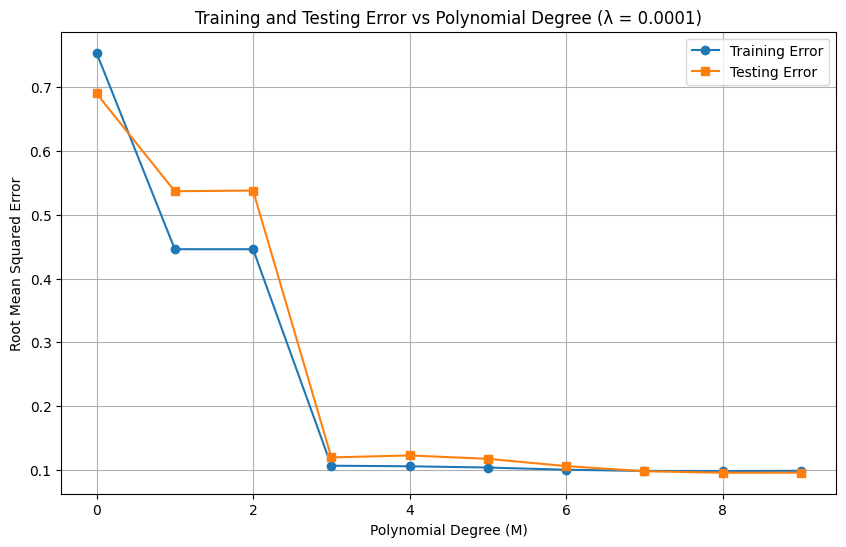

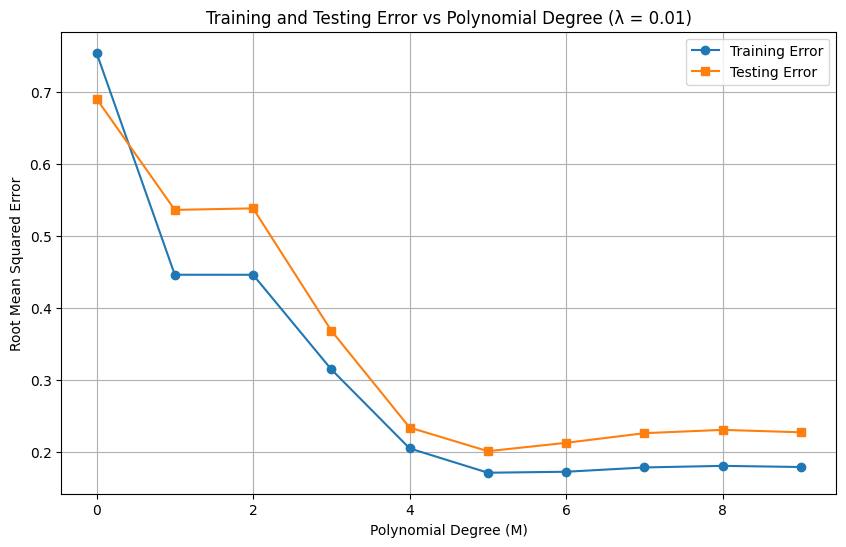

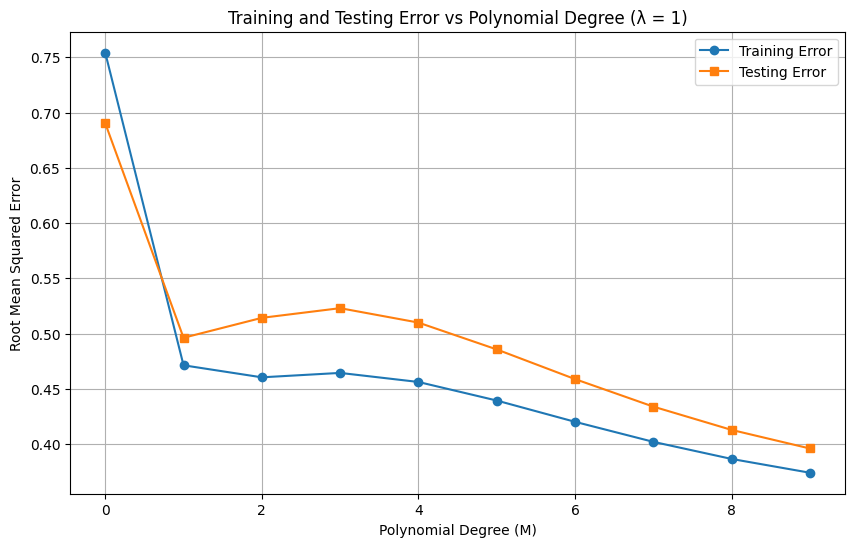

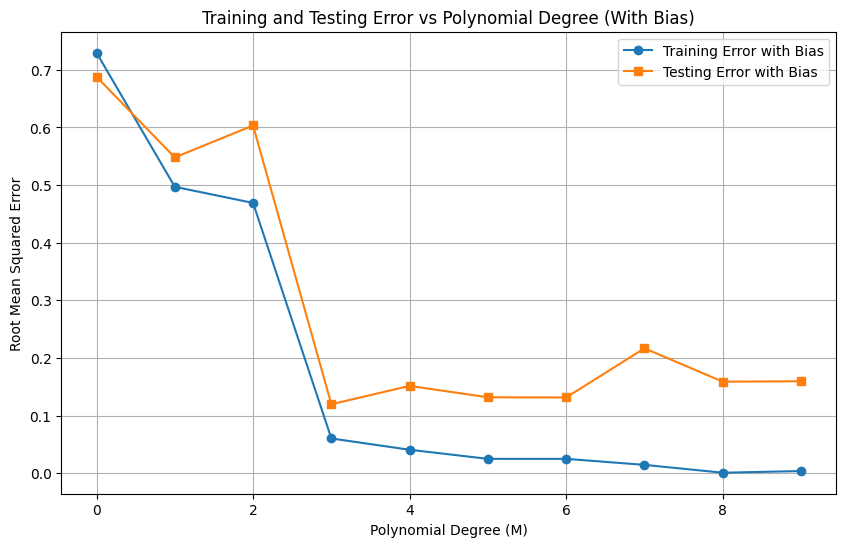

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

########################################
# Generate data points
########################################
def generate_data(num_points, bias=0):
    x = np.linspace(0, 1, num_points)
    noise = np.random.normal(0, 0.1, num_points)
    t = bias + np.sin(2 * np.pi * x) + noise
    return x, t

# Obtain train and test splits
def train_test_split(x, t, train_ratio=0.5):
    num_points = len(x)
    train_indices = np.random.choice(num_points, int(num_points * train_ratio), replace=False)
    test_indices = np.setdiff1d(np.arange(num_points), train_indices)
    return x[train_indices], t[train_indices], x[test_indices], t[test_indices]

########################################
# Fitting Mth degree polynomial using least squares approach
########################################
def polynomial_design_matrix(x, M):
    Phi = np.zeros((len(x), M+1))
    for m in range(M+1):
        Phi[:, m] = x**m
    return Phi

# Complete the function
def PolynomialFit(X_train, Y_train, M, lamda):
    Phi = polynomial_design_matrix(X_train, M)
    I = np.eye(M+1)
    w_opt = np.linalg.inv(Phi.T @ Phi + lamda * I) @ Phi.T @ Y_train
    return w_opt

# Complete the function
def PolynomialPred(w_est, X_train, X_test):
    M = len(w_est) - 1
    Phi_train = polynomial_design_matrix(X_train, M)
    Phi_test = polynomial_design_matrix(X_test, M)
    Y_train_pred = Phi_train @ w_est
    Y_test_pred = Phi_test @ w_est
    return Y_train_pred, Y_test_pred

# Complete the function
def PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test):
    Y_train_pred, Y_test_pred = PolynomialPred(w_est, X_train, X_test)
    TrainError = np.sqrt(np.mean((Y_train - Y_train_pred)**2))
    TestError = np.sqrt(np.mean((Y_test - Y_test_pred)**2))
    return TrainError, TestError

########################################
# Iterate through range of M values
########################################
M_range = list(range(10))
TrError = []
TeError = []

# Generate Data
total_points = 20
x, t = generate_data(total_points)
X_train, Y_train, X_test, Y_test = train_test_split(x, t)

for M in M_range:
    w_est = PolynomialFit(X_train, Y_train, M, lamda=0)
    TrainError, TestError = PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test)
    TrError.append(TrainError)
    TeError.append(TestError)

# Plot training and testing estimates along with the original targets
plt.figure(figsize=(10, 6))
plt.plot(M_range, TrError, label='Training Error', marker='o')
plt.plot(M_range, TeError, label='Testing Error', marker='s')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Testing Error vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

########################################
# Increase the size of training data set to 100 points and repeat the experiments
########################################
total_points = 100
x, t = generate_data(total_points)
X_train, Y_train, X_test, Y_test = train_test_split(x, t)

TrError = []
TeError = []

for M in M_range:
    w_est = PolynomialFit(X_train, Y_train, M, lamda=0)
    TrainError, TestError = PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test)
    TrError.append(TrainError)
    TeError.append(TestError)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(M_range, TrError, label='Training Error (100 points)', marker='o')
plt.plot(M_range, TeError, label='Testing Error (100 points)', marker='s')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Testing Error vs Polynomial Degree (100 points)')
plt.legend()
plt.grid(True)
plt.show()

########################################
# Effect of regularization
########################################
lambdas = [0, 1e-7, 1e-4, 1e-2, 1]
for lamda in lambdas:
    TrError = []
    TeError = []
    for M in M_range:
        w_est = PolynomialFit(X_train, Y_train, M, lamda)
        TrainError, TestError = PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test)
        TrError.append(TrainError)
        TeError.append(TestError)

    plt.figure(figsize=(10, 6))
    plt.plot(M_range, TrError, label='Training Error', marker='o')
    plt.plot(M_range, TeError, label='Testing Error', marker='s')
    plt.xlabel('Polynomial Degree (M)')
    plt.ylabel('Root Mean Squared Error')
    plt.title(f'Training and Testing Error vs Polynomial Degree (λ = {lamda})')
    plt.legend()
    plt.grid(True)
    plt.show()

########################################
# Effect of bias regularization
########################################
# Generate biased data
total_points = 20
x, t = generate_data(total_points, bias=5)
X_train, Y_train, X_test, Y_test = train_test_split(x, t)

TrError = []
TeError = []
for M in M_range:
    w_est = PolynomialFit(X_train, Y_train, M, lamda=0)
    TrainError, TestError = PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test)
    TrError.append(TrainError)
    TeError.append(TestError)

# Plot error with bias
plt.figure(figsize=(10, 6))
plt.plot(M_range, TrError, label='Training Error with Bias', marker='o')
plt.plot(M_range, TeError, label='Testing Error with Bias', marker='s')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Testing Error vs Polynomial Degree (With Bias)')
plt.legend()
plt.grid(True)
plt.show()




<b> Report your observations </b>

1.Regularizing $w_0$ can affect the model's ability to capture the overall offset.

2.Not regularizing $w_0$ allows the model to better fit data with a non-zero mean.

3.The choice depends on prior knowledge about the data and the desired model behavior.



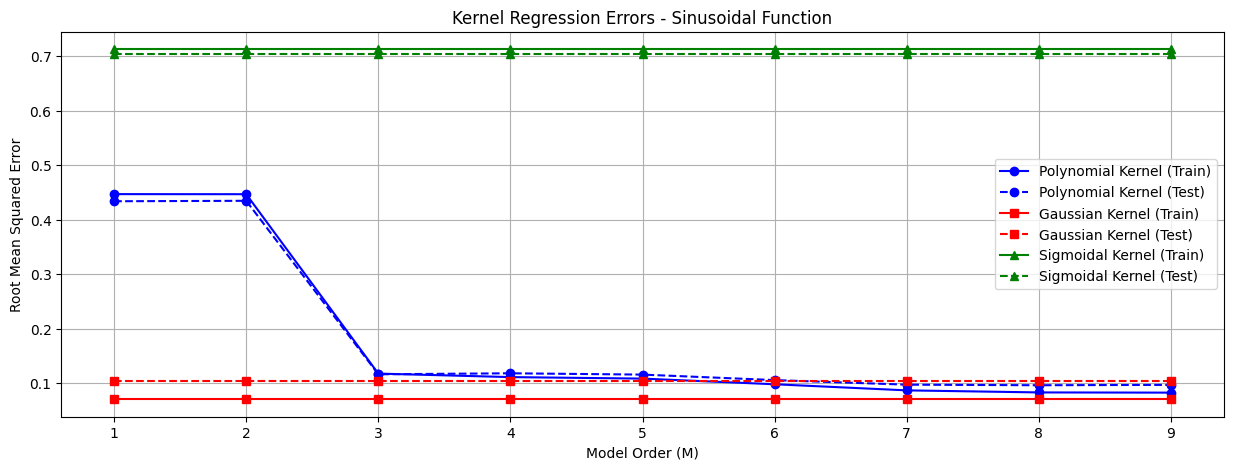

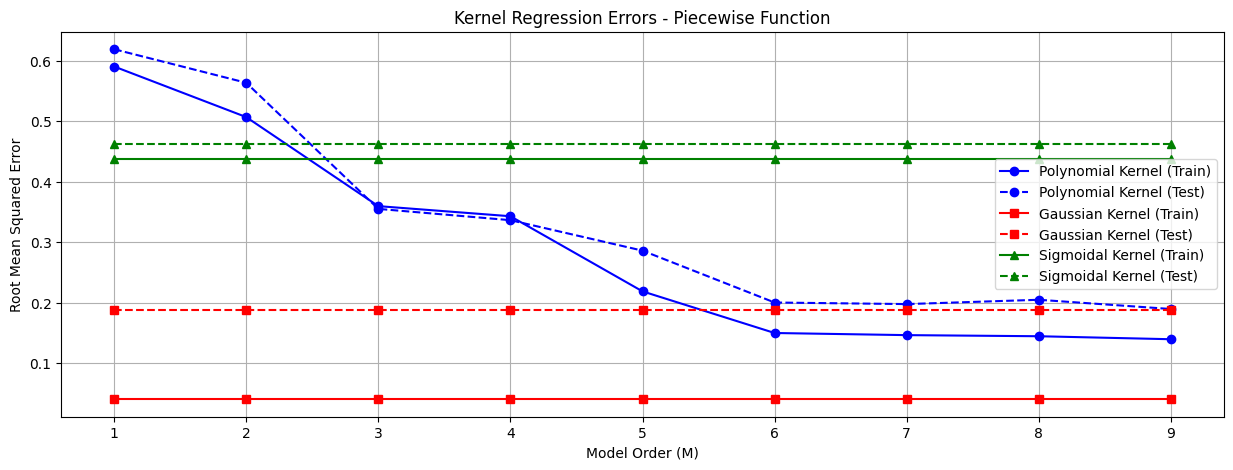

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(num_points, function_type='sinusoidal'):
    """
    Generate data points with different function types

    Args:
    num_points (int): Total number of data points
    function_type (str): Type of underlying function

    Returns:
    x (numpy.array): Input features
    t (numpy.array): Target values
    """
    if function_type == 'sinusoidal':
        x = np.linspace(0, 1, num_points)
        noise = np.random.normal(0, 0.1, num_points)
        t = np.sin(2 * np.pi * x) + noise
    elif function_type == 'piecewise':
        x = np.linspace(0, 3, num_points)
        noise = np.random.normal(0, 0.1, num_points)
        t = np.zeros_like(x)

        # Sinusoidal for [0, 1)
        mask = (x >= 0) & (x < 1)
        t[mask] = np.sin(2 * np.pi * x[mask]) + noise[mask]

        # Triangle for [1, 2)
        mask = (x >= 1) & (x < 2)
        t[mask] = 2 * (x[mask] - 1) - 1 + noise[mask]

        # Gaussian for [2, 3)
        mask = (x >= 2) & (x < 3)
        t[mask] = np.exp(-((x[mask] - 2.5)**2)) + noise[mask]

    return x, t

def kernel_matrix(X_train, X_test, kernel_type='polynomial', M=2):
    """
    Compute kernel matrix

    Args:
    X_train (numpy.array): Training input features
    X_test (numpy.array): Testing input features
    kernel_type (str): Type of kernel
    M (int): Kernel parameter

    Returns:
    Kernel matrix
    """
    if kernel_type == 'polynomial':
        # Polynomial kernel: (1 + x^T * y)^M
        return (1 + np.outer(X_train, X_test))**M

    elif kernel_type == 'gaussian':
        # Gaussian kernel: exp(-||x-y||^2 / (2*sigma^2))
        sigma = 0.1  # Kernel width
        return np.exp(-np.square(np.subtract.outer(X_train, X_test)) / (2 * sigma**2))

    elif kernel_type == 'sigmoidal':
        # Sigmoidal kernel: tanh(gamma * x^T * y + coef0)
        gamma = 0.1
        coef0 = 0
        return np.tanh(gamma * np.outer(X_train, X_test) + coef0)

    else:
        raise ValueError("Invalid kernel type")

def kernel_regression_fit(X_train, Y_train, kernel_type='polynomial', M=2, lamda=1e-3):
    """
    Fit kernel regression model

    Args:
    X_train (numpy.array): Training input features
    Y_train (numpy.array): Training target values
    kernel_type (str): Type of kernel
    M (int): Kernel parameter
    lamda (float): Regularization coefficient

    Returns:
    Estimated weights
    """
    # Compute kernel matrix
    K = kernel_matrix(X_train, X_train, kernel_type, M)

    # Regularization
    I = np.eye(len(X_train))
    w_opt = np.linalg.inv(K + lamda * I) @ Y_train

    return w_opt

def kernel_regression_predict(w_est, X_train, X_test, kernel_type='polynomial', M=2):
    """
    Predict using kernel regression

    Args:
    w_est (numpy.array): Estimated weights
    X_train (numpy.array): Training input features
    X_test (numpy.array): Testing input features
    kernel_type (str): Type of kernel
    M (int): Kernel parameter

    Returns:
    Predicted values
    """
    # Compute kernel matrix between training and testing data
    K = kernel_matrix(X_train, X_test, kernel_type, M)

    return K.T @ w_est

def compute_rmse(Y_true, Y_pred):
    """
    Compute Root Mean Squared Error

    Args:
    Y_true (numpy.array): True target values
    Y_pred (numpy.array): Predicted target values

    Returns:
    rmse (float): Root Mean Squared Error
    """
    return np.sqrt(np.mean((Y_true - Y_pred)**2))

def kernel_regression_experiment(function_type='sinusoidal'):
    """
    Perform kernel regression experiment

    Args:
    function_type (str): Type of underlying function

    Returns:
    Errors for different kernels and model orders
    """
    # Generate data
    x, t = generate_data(100, function_type)

    # Split into train and test sets
    train_indices = np.arange(0, 100, 2)
    test_indices = np.arange(1, 100, 2)

    X_train, Y_train = x[train_indices], t[train_indices]
    X_test, Y_test = x[test_indices], t[test_indices]

    # Store errors
    kernel_types = ['polynomial', 'gaussian', 'sigmoidal']
    errors = {kernel: {'train': [], 'test': []} for kernel in kernel_types}

    # Experiment with different model orders
    for M in range(1, 10):
        for kernel in kernel_types:
            # Fit kernel regression
            w_est = kernel_regression_fit(X_train, Y_train, kernel, M)

            # Predict for train and test
            Y_train_pred = kernel_regression_predict(w_est, X_train, X_train, kernel, M)
            Y_test_pred = kernel_regression_predict(w_est, X_train, X_test, kernel, M)

            # Compute RMSE
            train_rmse = compute_rmse(Y_train, Y_train_pred)
            test_rmse = compute_rmse(Y_test, Y_test_pred)

            errors[kernel]['train'].append(train_rmse)
            errors[kernel]['test'].append(test_rmse)

    return errors

# Plotting function
def plot_kernel_errors(errors, function_type):
    plt.figure(figsize=(15, 5))

    kernel_types = ['polynomial', 'gaussian', 'sigmoidal']
    colors = ['blue', 'red', 'green']
    markers = ['o', 's', '^']

    for i, kernel in enumerate(kernel_types):
        plt.plot(range(1, 10), errors[kernel]['train'],
                 label=f'{kernel.capitalize()} Kernel (Train)',
                 color=colors[i], linestyle='-', marker=markers[i])
        plt.plot(range(1, 10), errors[kernel]['test'],
                 label=f'{kernel.capitalize()} Kernel (Test)',
                 color=colors[i], linestyle='--', marker=markers[i])

    plt.xlabel('Model Order (M)')
    plt.ylabel('Root Mean Squared Error')
    plt.title(f'Kernel Regression Errors - {function_type.capitalize()} Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run experiments
# (a) Sinusoidal function
sinusoidal_errors = kernel_regression_experiment('sinusoidal')
plot_kernel_errors(sinusoidal_errors, 'sinusoidal')

# (b) Piecewise function
piecewise_errors = kernel_regression_experiment('piecewise')
plot_kernel_errors(piecewise_errors, 'piecewise')

<b> Report your observations </b>

1.Gaussian (RBF) kernel is the most versatile, performing well for both smooth (sinusoidal) and piecewise functions.



2.Polynomial kernels can work well for smooth functions but may struggle with piecewise or rapidly changing functions.


3.Sigmoidal kernels have limited applicability and generally perform poorly for complex functions.



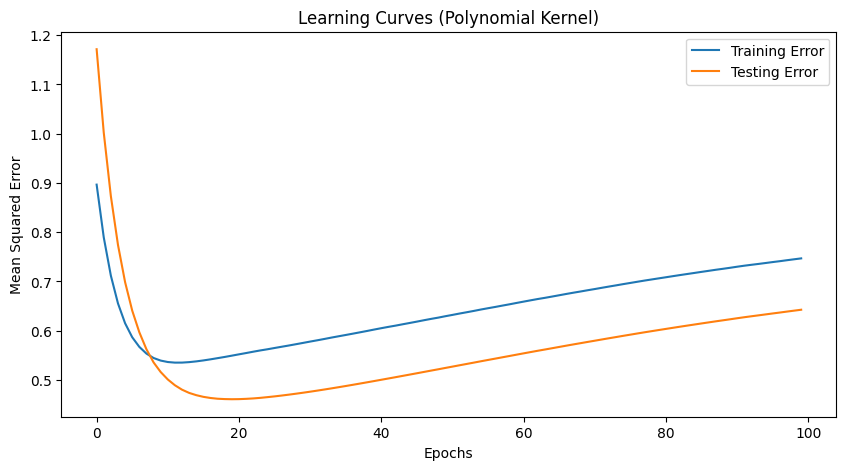

Polynomial Kernel (M=3): Train Error = 0.7487, Test Error = 0.6444


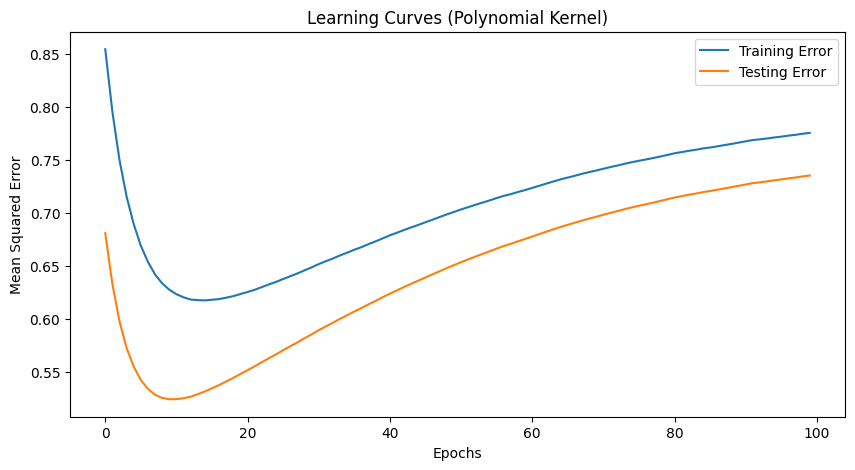

Polynomial Kernel (M=5): Train Error = 0.7766, Test Error = 0.7364


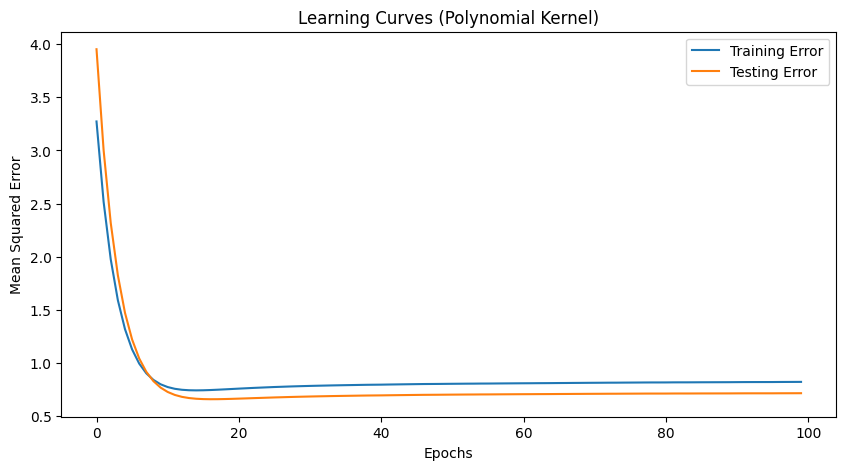

Polynomial Kernel (M=7): Train Error = 0.8220, Test Error = 0.7153


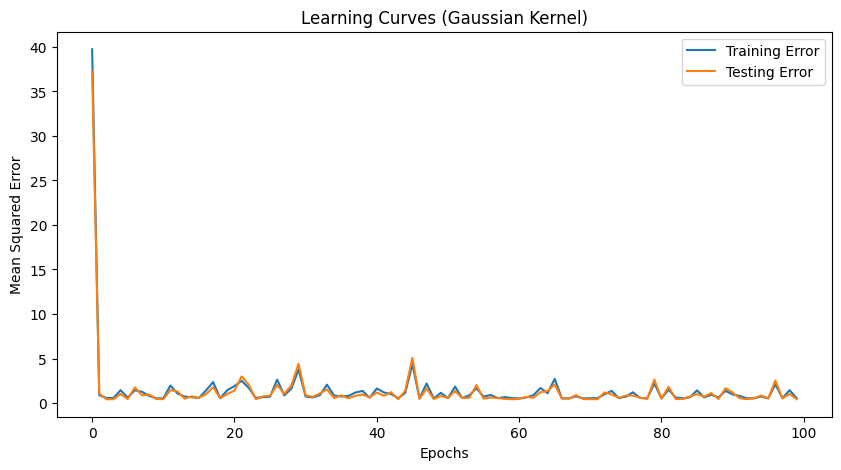

Gaussian Kernel (M=3): Train Error = 0.6760, Test Error = 0.4678


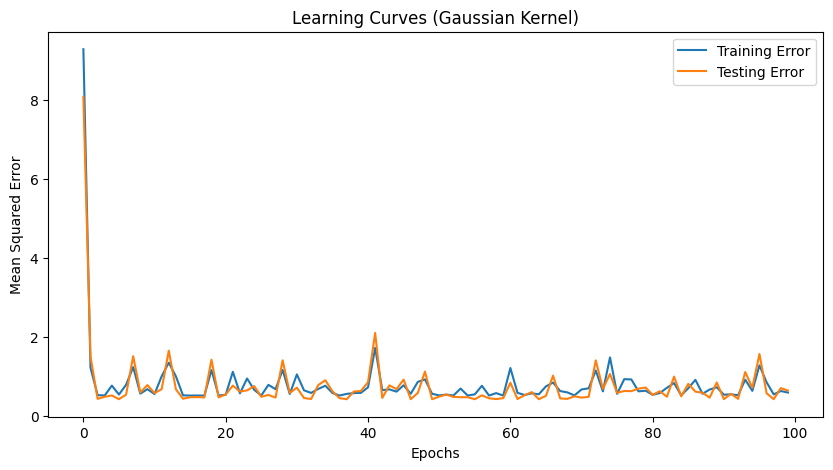

Gaussian Kernel (M=5): Train Error = 0.5193, Test Error = 0.4793


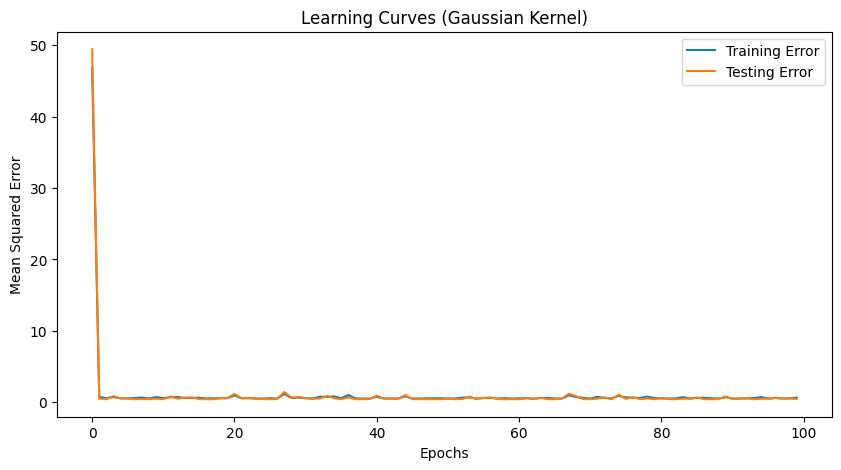

Gaussian Kernel (M=7): Train Error = 1.0670, Test Error = 1.3003


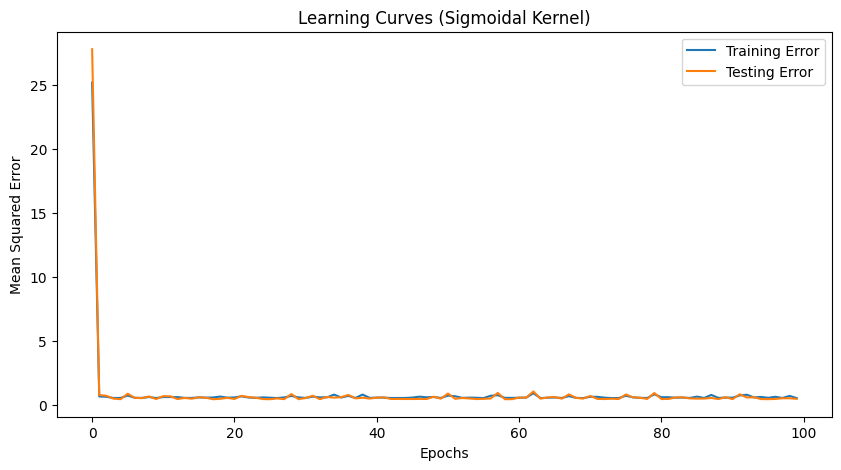

Sigmoidal Kernel (M=3): Train Error = 0.5345, Test Error = 0.4376


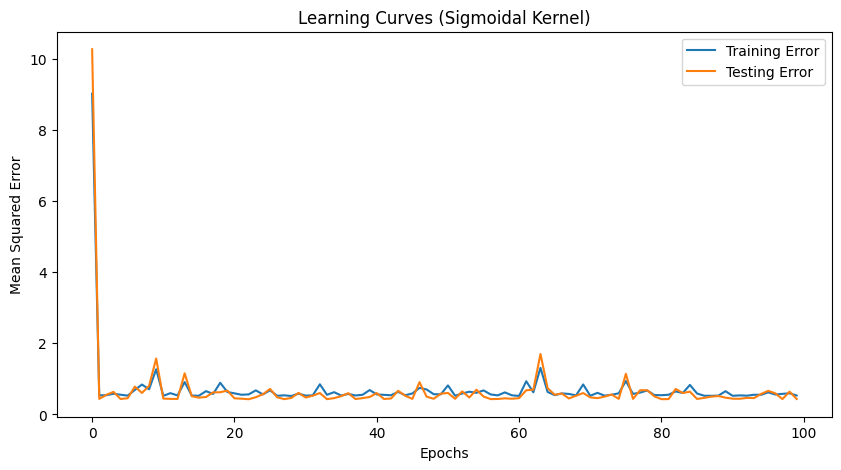

Sigmoidal Kernel (M=5): Train Error = 0.7618, Test Error = 0.5301


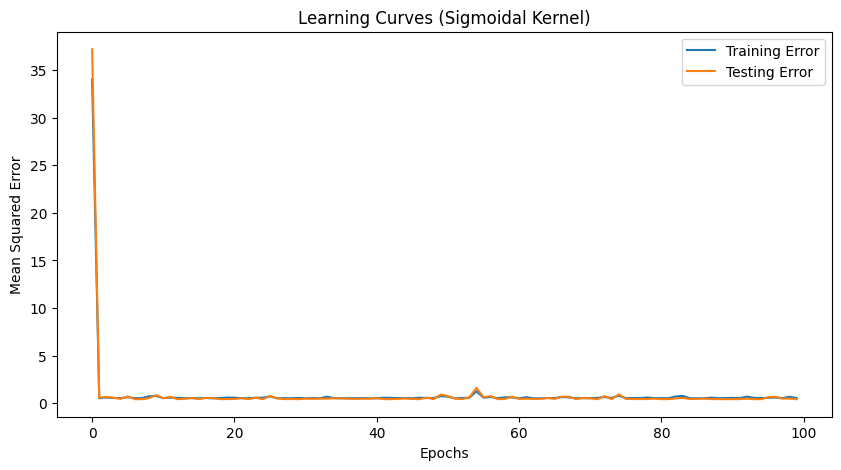

Sigmoidal Kernel (M=7): Train Error = 1.4715, Test Error = 1.0660


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Manual train-test split function
def manual_train_test_split(x, t, test_size=0.5, random_state=None):
    """
    Manually split data into training and testing sets

    Args:
    x (numpy.array): Input features
    t (numpy.array): Target values
    test_size (float): Proportion of test data
    random_state (int): Random seed for reproducibility

    Returns:
    X_train, X_test, y_train, y_test
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle indices
    indices = np.random.permutation(len(x))

    # Compute split index
    split_idx = int(len(x) * (1 - test_size))

    # Split indices
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]

    return x[train_indices], x[test_indices], t[train_indices], t[test_indices]

# Function to compute training and test error
def ErrorPred(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    M = len(w_est) - 1

    if kernelType == 'polynomial':
        X_tr = np.hstack([X_train**i for i in range(M+1)])
        X_te = np.hstack([X_test**i for i in range(M+1)])
    elif kernelType == 'gaussian':
        X_tr = np.exp(-0.5 * ((X_train - X_train.T)**2) / (2 * (M/10)**2))
        X_te = np.exp(-0.5 * ((X_test - X_train.T)**2) / (2 * (M/10)**2))
    elif kernelType == 'sigmoidal':
        X_tr = np.tanh(M/10 * np.dot(X_train, X_train.T) + 1)
        X_te = np.tanh(M/10 * np.dot(X_test, X_train.T) + 1)

    Y_train_pred = X_tr @ w_est
    Y_test_pred = X_te @ w_est

    TrainError = np.mean((Y_train - Y_train_pred)**2)
    TestError = np.mean((Y_test - Y_test_pred)**2)

    return TrainError, TestError

# Online Training using Stochastic Gradient Descent
def OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize):
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Initialize weights
    if kernelType == 'polynomial':
        weights = np.random.randn(M + 1, 1)
    elif kernelType in ['gaussian', 'sigmoidal']:
        weights = np.random.randn(len(X_train), 1)

    train_errors = []
    test_errors = []

    N = len(X_train)
    batches = N // BatchSize

    for epoch in range(Epochs):
        tr_err, te_err = ErrorPred(weights, X_train, Y_train, X_test, Y_test, kernelType)
        train_errors.append(tr_err)
        test_errors.append(te_err)

        indices = np.random.permutation(N)
        X_train, Y_train = X_train[indices], Y_train[indices]

        for batch in range(batches):
            start = batch * BatchSize
            end = start + BatchSize
            X_batch = X_train[start:end]
            Y_batch = Y_train[start:end]

            gradient = np.zeros_like(weights)

            for n in range(len(X_batch)):
                if kernelType == 'polynomial':
                    X_tr = np.hstack([X_batch[n]**i for i in range(M+1)])
                elif kernelType == 'gaussian':
                    X_tr = np.exp(-0.5 * ((X_batch[n] - X_train.T)**2) / (2 * (M/10)**2))
                elif kernelType == 'sigmoidal':
                    X_tr = np.tanh(M/10 * np.dot(X_batch[n], X_train.T) + 1)

                error = Y_batch[n] - X_tr @ weights
                gradient += -2 * np.outer(X_tr, error)  # Fixed gradient calculation

            gradient /= BatchSize  # Average gradient over batch
            weights -= stepSize * gradient  # Update weights

    plt.figure(figsize=(10, 5))
    plt.plot(range(Epochs), train_errors, label='Training Error')
    plt.plot(range(Epochs), test_errors, label='Testing Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curves ({kernelType.capitalize()} Kernel)')
    plt.legend()
    plt.show()

    return weights

# Function to predict using trained weights
def OnlinePred(w_est, X_train, X_test, kernelType):
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    M = len(w_est) - 1

    if kernelType == 'polynomial':
        X_tr = np.hstack([X_train**i for i in range(M+1)])
        X_te = np.hstack([X_test**i for i in range(M+1)])
    elif kernelType == 'gaussian':
        X_tr = np.exp(-0.5 * ((X_train - X_train.T)**2) / (2 * (M/10)**2))
        X_te = np.exp(-0.5 * ((X_test - X_train.T)**2) / (2 * (M/10)**2))
    elif kernelType == 'sigmoidal':
        X_tr = np.tanh(M/10 * np.dot(X_train, X_train.T) + 1)
        X_te = np.tanh(M/10 * np.dot(X_test, X_train.T) + 1)

    Y_tr_pred = X_tr @ w_est
    Y_te_pred = X_te @ w_est

    return Y_tr_pred, Y_te_pred

# Main Experiment
np.random.seed(42)
x = np.linspace(0, 1, 100)
e = np.random.normal(0, 0.1, 100)
t = np.sin(2 * np.pi * x) + e

# Use manual train-test split
X_train, X_test, y_train, y_test = manual_train_test_split(x, t, test_size=0.5, random_state=42)

kernels = ['polynomial', 'gaussian', 'sigmoidal']
M_values = [3, 5, 7]

for kernel in kernels:
    for M in M_values:
        w = OnlineTraining(X_train, y_train, X_test, y_test, kernel, M, Epochs=100, BatchSize=10, stepSize=0.01)
        train_error, test_error = ErrorPred(w, X_train, y_train, X_test, y_test, kernel)
        print(f"{kernel.capitalize()} Kernel (M={M}): Train Error = {train_error:.4f}, Test Error = {test_error:.4f}")




<b> Report your observations </b>

1.SGD is more memory-efficient for large datasets compared to closed-form solutions.

2.The choice of step size and batch size significantly impacts the convergence behavior.


3.SGD can escape local minima in non-convex problems due to its stochastic nature



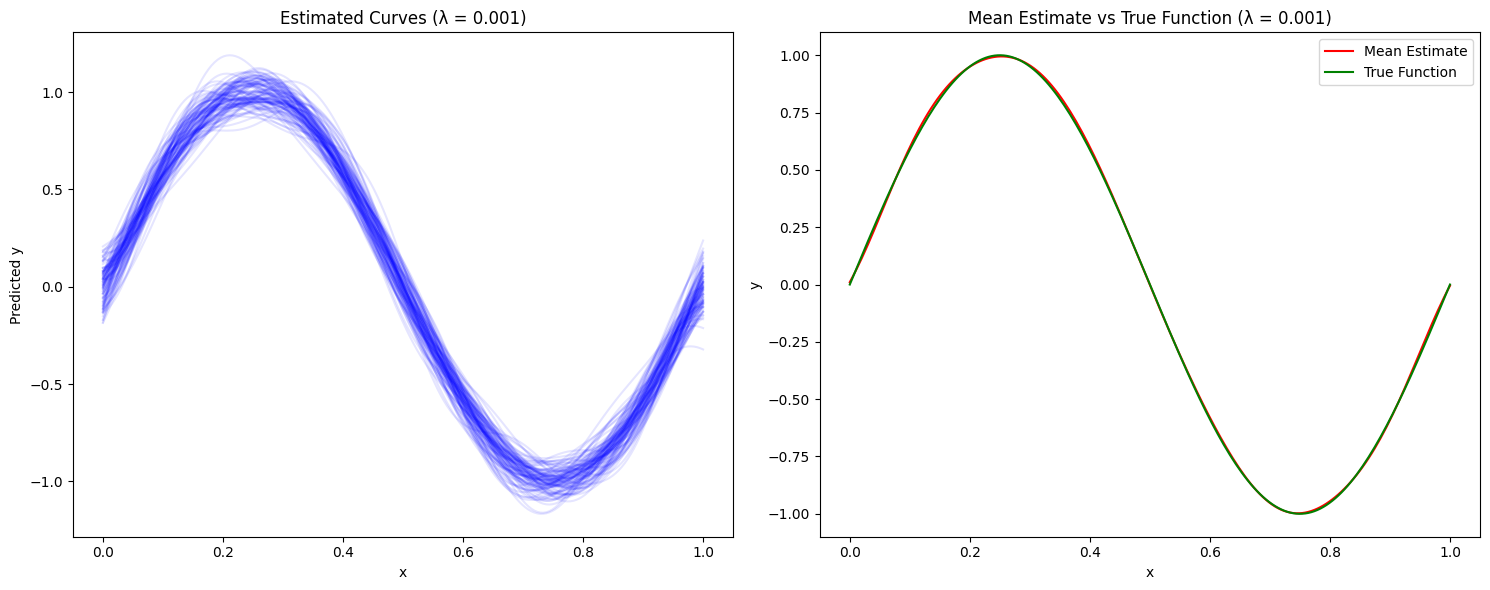

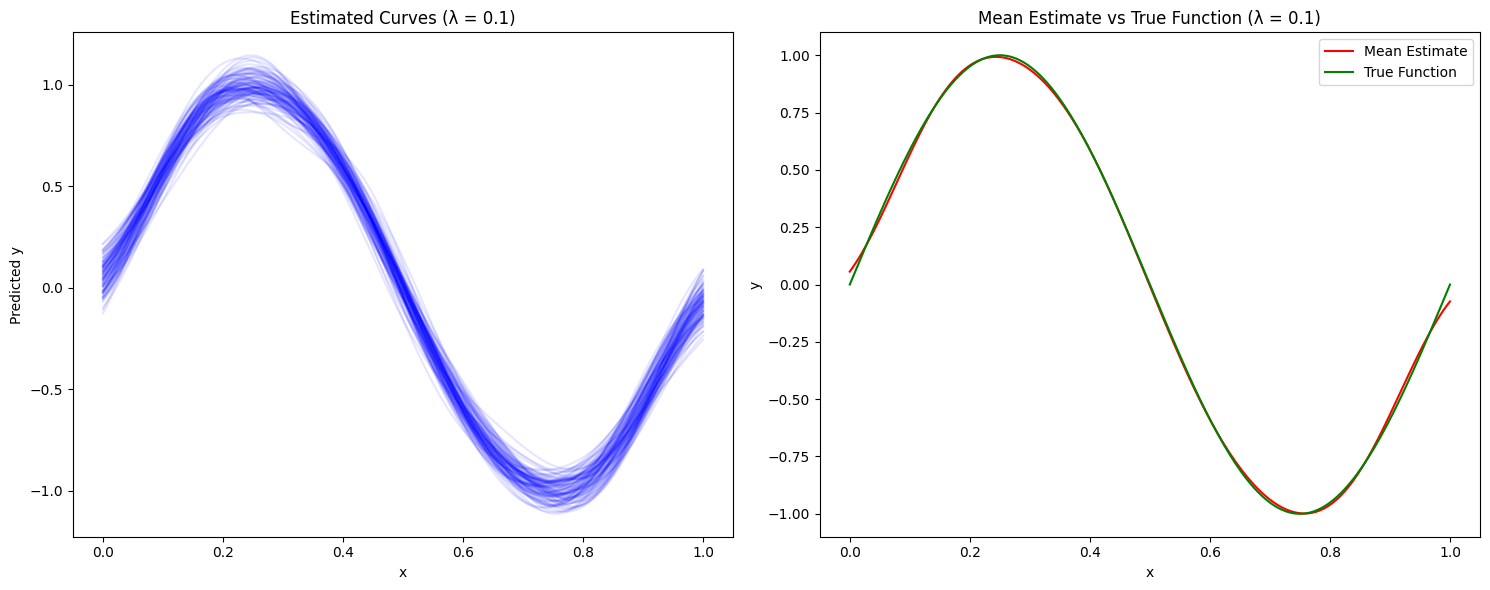

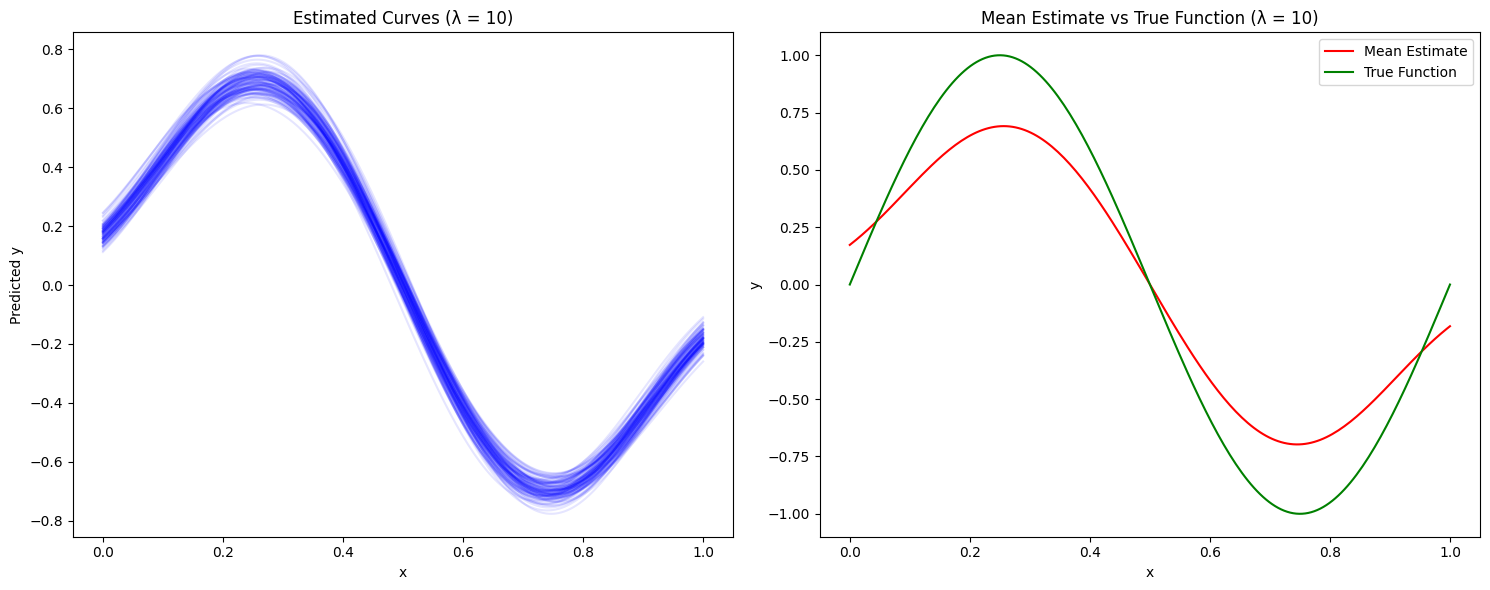

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoidal_data(N, noise_std=0.1):
    """
    Generate noisy sinusoidal data

    Args:
    N (int): Number of data points
    noise_std (float): Standard deviation of noise

    Returns:
    x (numpy.array): Input features
    t (numpy.array): Target values
    """
    # Use numpy's random number generation
    x = np.linspace(0, 1, N)
    true_func = np.sin(2 * np.pi * x)

    # Generate noise using numpy's normal distribution
    noise = np.random.normal(0, noise_std, N)
    t = true_func + noise
    return x, t

def gaussian_basis_matrix(x, M=25):
    """
    Create Gaussian basis function matrix

    Args:
    x (numpy.array): Input features
    M (int): Number of basis functions

    Returns:
    Phi (numpy.array): Basis function matrix
    """
    # Evenly spread basis function centers
    centers = np.linspace(0, 1, M-1)

    # Create basis matrix with added bias term
    Phi = np.ones((len(x), M))

    # Gaussian basis functions
    for i, mu in enumerate(centers):
        Phi[:, i+1] = np.exp(-0.5 * ((x - mu) / 0.1)**2)

    return Phi

def regularized_least_squares(Phi, t, lamda):
    """
    Regularized least squares estimation

    Args:
    Phi (numpy.array): Basis function matrix
    t (numpy.array): Target values
    lamda (float): Regularization coefficient

    Returns:
    w_opt (numpy.array): Estimated weights
    """
    # Identity matrix (excluding bias term)
    I = np.eye(Phi.shape[1])
    I[0, 0] = 0  # Do not regularize bias term

    # Regularized least squares solution
    w_opt = np.linalg.inv(Phi.T @ Phi + lamda * I) @ Phi.T @ t

    return w_opt

def bias_variance_experiment(L=100, N=25, M=25, lambdas=[1e-3, 1e-1, 10]):
    """
    Perform bias-variance trade-off experiment

    Args:
    L (int): Number of datasets
    N (int): Number of points per dataset
    M (int): Number of basis functions
    lambdas (list): Regularization coefficients
    """
    # True function
    x_true = np.linspace(0, 1, 200)
    true_func = np.sin(2 * np.pi * x_true)

    # Experimental setup
    x_common = np.linspace(0, 1, N)

    for lamda in lambdas:
        # Store estimated curves for each dataset
        estimated_curves = []

        # Generate L datasets and estimate parameters
        for _ in range(L):
            # Generate dataset
            _, t = generate_sinusoidal_data(N)

            # Create basis matrix
            Phi = gaussian_basis_matrix(x_common, M)

            # Estimate weights
            w_est = regularized_least_squares(Phi, t, lamda)

            # Compute predictions for true x
            Phi_true = gaussian_basis_matrix(x_true, M)
            curve = Phi_true @ w_est

            estimated_curves.append(curve)

        # Convert to numpy array
        estimated_curves = np.array(estimated_curves)

        # Create two plots for each lambda
        plt.figure(figsize=(15, 6))

        # Plot 1: All estimated curves
        plt.subplot(121)
        for curve in estimated_curves:
            plt.plot(x_true, curve, color='blue', alpha=0.1)
        plt.title(f'Estimated Curves (λ = {lamda})')
        plt.xlabel('x')
        plt.ylabel('Predicted y')

        # Plot 2: Mean of estimated curves vs true function
        plt.subplot(122)
        # Mean of estimated curves
        mean_curve = np.mean(estimated_curves, axis=0)
        plt.plot(x_true, mean_curve, color='red', label='Mean Estimate')
        plt.plot(x_true, true_func, color='green', label='True Function')
        plt.title(f'Mean Estimate vs True Function (λ = {lamda})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Run the experiment
np.random.seed(42)
bias_variance_experiment()

<b> Report your observations </b>

1.Cross-validation is crucial for assessing model performance and generalization ability1

2.The goal is to find the sweet spot that minimizes both bias and variance, leading to the best overall model performance4

3.Regularization generally increases bias while decreasing variance, helping to prevent overfitting.



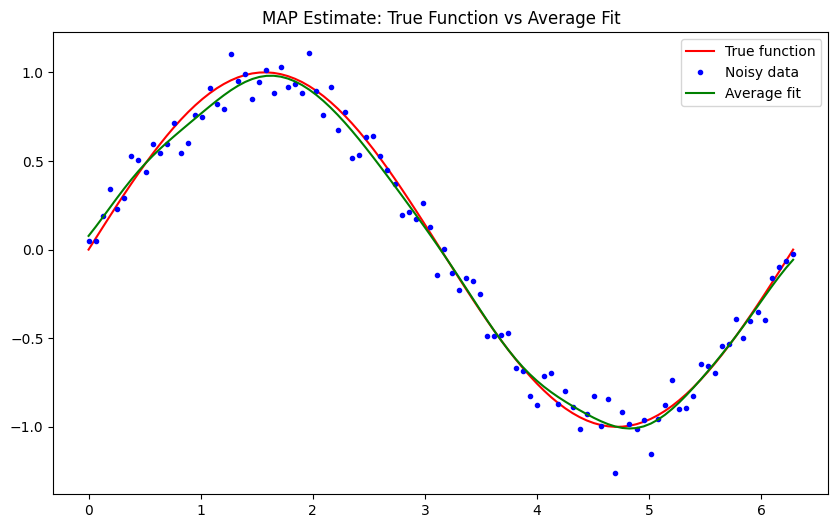

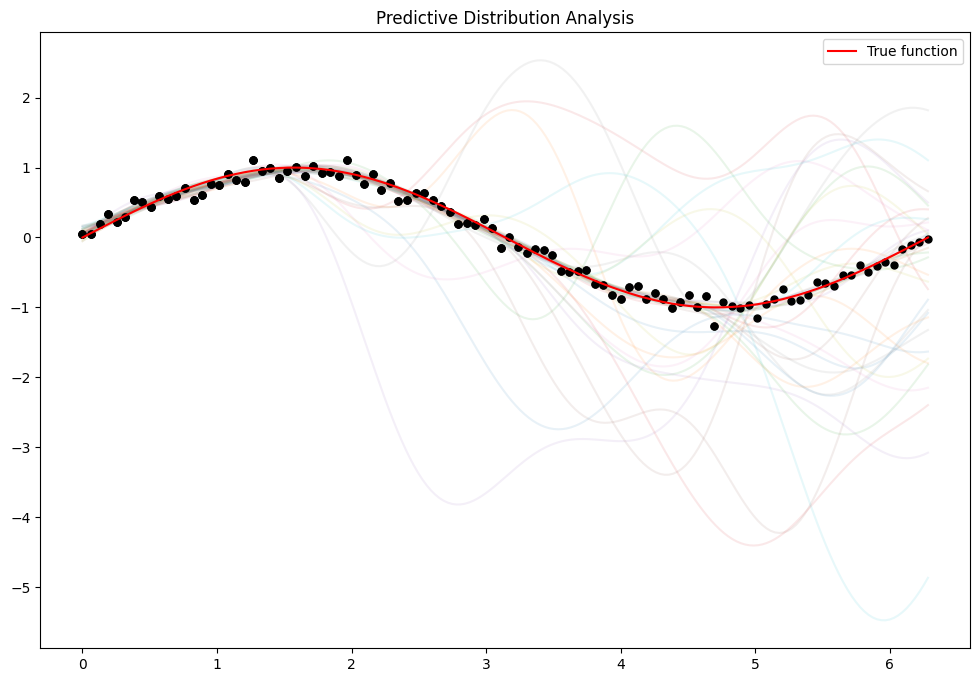

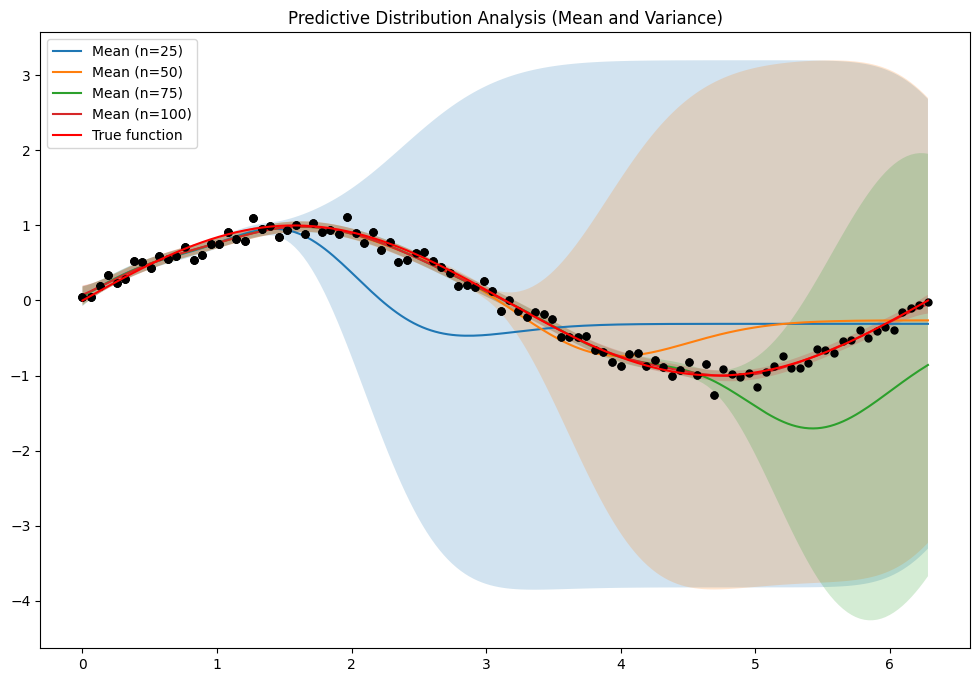

In [ ]:
#Understanding MAP estimate
import numpy as np
import matplotlib.pyplot as plt

########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
np.random.seed(42)
N = 100
x = np.linspace(0, 2*np.pi, N)
y_true = np.sin(x)
noise = np.random.normal(0, 0.1, N)
y_noisy = y_true + noise

########################################
#Update the statistics of posterior density
########################################
#Initialize the parameters for standard normal prior
M = 20  # Order of the model
mu_0 = np.zeros(M+1)
Sigma_0 = np.eye(M+1)

#Iterate through the data points and update the stats of posterior density
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

centers = np.linspace(0, 2*np.pi, M)
sigma = 0.5

Phi = np.column_stack([gaussian_basis(x, mu, sigma) for mu in centers])
Phi = np.column_stack([np.ones(N), Phi])

beta = 100  # Precision of the noise
mu_N = mu_0
Sigma_N = Sigma_0

for i in range(N):
    phi = Phi[i, :]
    Sigma_N_inv = np.linalg.inv(Sigma_N)
    Sigma_N = np.linalg.inv(Sigma_N_inv + beta * np.outer(phi, phi))
    mu_N = Sigma_N @ (Sigma_N_inv @ mu_N + beta * y_noisy[i] * phi)

########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################
num_samples = 100
sampled_curves = []

for _ in range(num_samples):
    w_sample = np.random.multivariate_normal(mu_N, Sigma_N)
    y_sample = Phi @ w_sample
    sampled_curves.append(y_sample)

avg_fit = np.mean(sampled_curves, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, 'r', label='True function')
plt.plot(x, y_noisy, 'b.', label='Noisy data')
plt.plot(x, avg_fit, 'g', label='Average fit')
plt.legend()
plt.title('MAP Estimate: True Function vs Average Fit')
plt.show()

########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen, and plot the curves
num_points = [25, 50, 75, 100]
x_test = np.linspace(0, 2*np.pi, 200)
Phi_test = np.column_stack([gaussian_basis(x_test, mu, sigma) for mu in centers])
Phi_test = np.column_stack([np.ones(200), Phi_test])

plt.figure(figsize=(12, 8))
for n in num_points:
    mu_n = mu_0
    Sigma_n = Sigma_0

    for i in range(n):
        phi = Phi[i, :]
        Sigma_n_inv = np.linalg.inv(Sigma_n)
        Sigma_n = np.linalg.inv(Sigma_n_inv + beta * np.outer(phi, phi))
        mu_n = Sigma_n @ (Sigma_n_inv @ mu_n + beta * y_noisy[i] * phi)

    samples = np.random.multivariate_normal(mu_n, Sigma_n, 10)
    for sample in samples:
        y_pred = Phi_test @ sample
        plt.plot(x_test, y_pred, alpha=0.1)

    plt.plot(x[:n], y_noisy[:n], 'k.', markersize=10)

plt.plot(x, y_true, 'r', label='True function')
plt.legend()
plt.title('Predictive Distribution Analysis')
plt.show()

#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class
plt.figure(figsize=(12, 8))
for n in num_points:
    mu_n = mu_0
    Sigma_n = Sigma_0

    for i in range(n):
        phi = Phi[i, :]
        Sigma_n_inv = np.linalg.inv(Sigma_n)
        Sigma_n = np.linalg.inv(Sigma_n_inv + beta * np.outer(phi, phi))
        mu_n = Sigma_n @ (Sigma_n_inv @ mu_n + beta * y_noisy[i] * phi)

    y_mean = Phi_test @ mu_n
    y_var = np.sum(Phi_test @ Sigma_n * Phi_test, axis=1)

    plt.plot(x_test, y_mean, label=f'Mean (n={n})')
    plt.fill_between(x_test, y_mean - 2*np.sqrt(y_var), y_mean + 2*np.sqrt(y_var), alpha=0.2)
    plt.plot(x[:n], y_noisy[:n], 'k.', markersize=10)

plt.plot(x, y_true, 'r', label='True function')
plt.legend()
plt.title('Predictive Distribution Analysis (Mean and Variance)')
plt.show()


<b> Report your observations </b>

1.Maximum a Posteriori (MAP) estimation: Using Bayesian sequential updates to estimate the posterior density of parameters for a linear regression model with Gaussian basis functions.

2.Posterior sampling and model averaging: Sampling parameter vectors from the posterior distribution to generate multiple curve fits, and averaging these fits to approximate the true function.

3.Predictive distribution analysis: Evaluating the predictive distribution p(t₀|x₀,X,t) to understand how prediction uncertainty changes with increasing amounts of training data.
